In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

import importlib

import sprawl
from sprawl import scoring


## Median gene scores are highly correlated across biological replicates

vz_Liver
vz_Liver peripheral


sample,vz_Liver_mouse1,vz_Liver_mouse2
sample,,
vz_Liver_mouse1,1.00000,0.93157
vz_Liver_mouse2,0.93157,1.00000


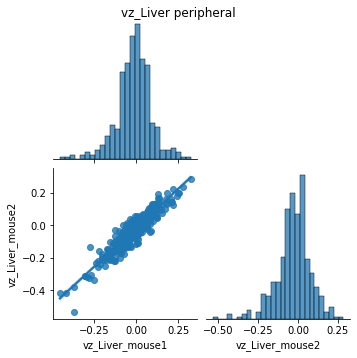

vz_Liver central


sample,vz_Liver_mouse1,vz_Liver_mouse2
sample,,
vz_Liver_mouse1,1.000000,0.930955
vz_Liver_mouse2,0.930955,1.000000


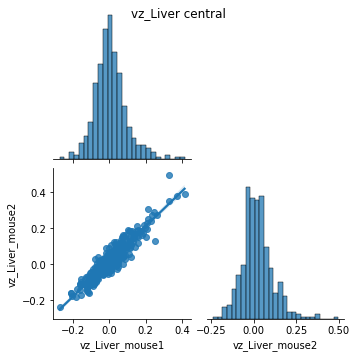

vz_Liver radial


sample,vz_Liver_mouse1,vz_Liver_mouse2
sample,,
vz_Liver_mouse1,1.000000,0.902734
vz_Liver_mouse2,0.902734,1.000000


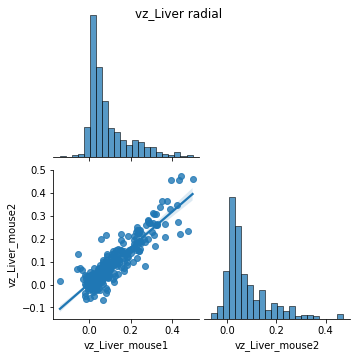

vz_Liver punctate


sample,vz_Liver_mouse1,vz_Liver_mouse2
sample,,
vz_Liver_mouse1,1.00000,0.95359
vz_Liver_mouse2,0.95359,1.00000


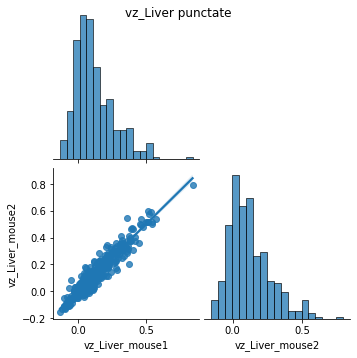

BICCN
BICCN peripheral


sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.962948
BICCN_mouse2,0.962948,1.000000


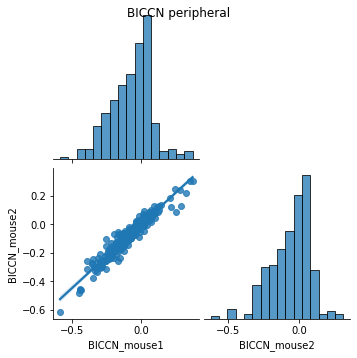

BICCN central


sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.962268
BICCN_mouse2,0.962268,1.000000


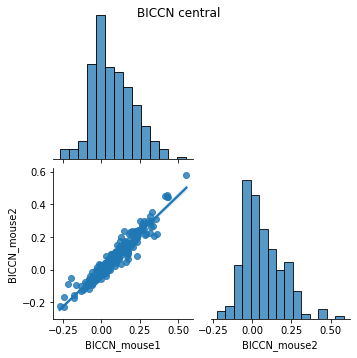

BICCN radial


sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.900705
BICCN_mouse2,0.900705,1.000000


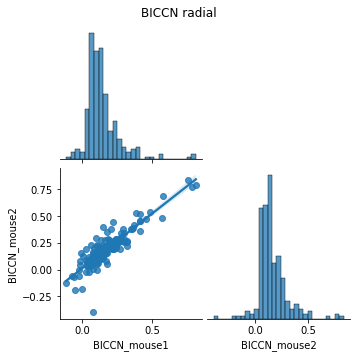

BICCN punctate


sample,BICCN_mouse1,BICCN_mouse2
sample,,
BICCN_mouse1,1.000000,0.938653
BICCN_mouse2,0.938653,1.000000


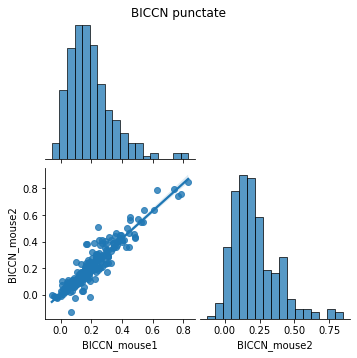

vz_Brainmap
vz_Brainmap peripheral


sample,vz_Brainmap_slice1,vz_Brainmap_slice2,vz_Brainmap_slice3
sample,,,
vz_Brainmap_slice1,1.000000,0.900348,0.909825
vz_Brainmap_slice2,0.900348,1.000000,0.914423
vz_Brainmap_slice3,0.909825,0.914423,1.000000


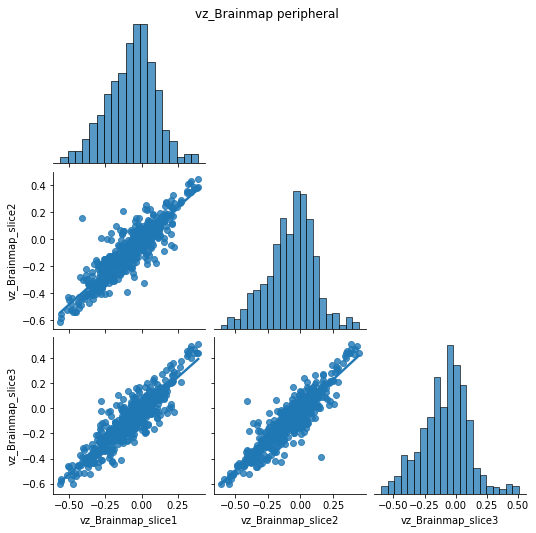

vz_Brainmap central


sample,vz_Brainmap_slice1,vz_Brainmap_slice2,vz_Brainmap_slice3
sample,,,
vz_Brainmap_slice1,1.000000,0.890458,0.898532
vz_Brainmap_slice2,0.890458,1.000000,0.887490
vz_Brainmap_slice3,0.898532,0.887490,1.000000


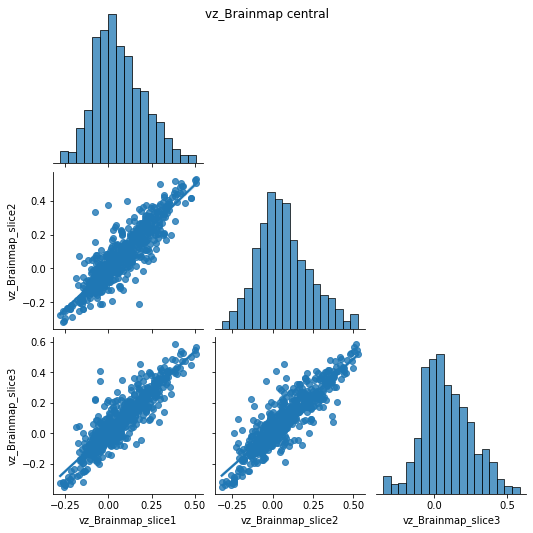

vz_Brainmap radial


sample,vz_Brainmap_slice1,vz_Brainmap_slice2,vz_Brainmap_slice3
sample,,,
vz_Brainmap_slice1,1.000000,0.394594,0.423562
vz_Brainmap_slice2,0.394594,1.000000,0.413449
vz_Brainmap_slice3,0.423562,0.413449,1.000000


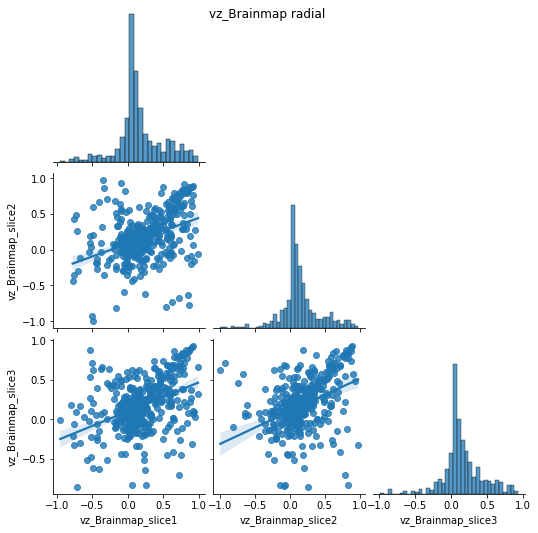

vz_Brainmap punctate


sample,vz_Brainmap_slice1,vz_Brainmap_slice2,vz_Brainmap_slice3
sample,,,
vz_Brainmap_slice1,1.000000,0.379430,0.470769
vz_Brainmap_slice2,0.379430,1.000000,0.463574
vz_Brainmap_slice3,0.470769,0.463574,1.000000


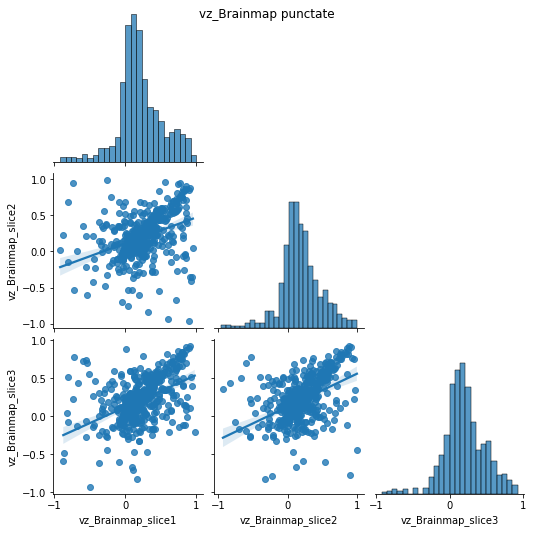

In [2]:
#Pairplots for experiments with replicate samples
#Iterates over all metrics and all datasets
#Reads in gene/cell tables and calculates the median gene score per experiment/sample
#Creates pairplots for median gene score between samples in the same experiment and calculates Pearson coefs

metrics = ['peripheral','central','radial','punctate']
experiment_samples = {
    'vz_Liver':[
        '../../nf_pipeline/outputs/vz_Liver_20220601_direct/gene_cell/vz_Liver_mouse1',
        '../../nf_pipeline/outputs/vz_Liver_20220601_direct/gene_cell/vz_Liver_mouse2',
    ],
    'BICCN':[
        '../../nf_pipeline/outputs/BICCN_20220601_direct/gene_cell/BICCN_mouse1',
        '../../nf_pipeline/outputs/BICCN_20220601_direct/gene_cell/BICCN_mouse2',
    ],
    'vz_Brainmap':[
        '../../nf_pipeline/outputs/vz_Brainmap_20220602_direct/gene_cell/vz_Brainmap_slice1',
        '../../nf_pipeline/outputs/vz_Brainmap_20220602_direct/gene_cell/vz_Brainmap_slice2',
        '../../nf_pipeline/outputs/vz_Brainmap_20220602_direct/gene_cell/vz_Brainmap_slice3',
    ],
}

for experiment,samples in experiment_samples.items():
    print(experiment)
    for metric in metrics:
        df = pd.DataFrame()
        for sample in samples:
            f_path = glob.glob(sample+'*'+metric+'*')
            if not f_path:
                continue
                
            sample_df = pd.read_csv(f_path[0])
            sample_df['sample'] = os.path.basename(sample)
            
            #Calculate the median gene scores and get associated bh_p values
            gene_df = scoring.gene_celltype_scoring(sample_df, gb_cols=['gene'])
            df = pd.concat((df,gene_df))

        if df.empty:
            continue
            
        #Pairplot of median gene score from all cells per gene
        sample_pair_df = df.pivot(
            index = 'gene',
            columns = 'sample',
            values = 'med_score',
        )
        print('{} {}'.format(experiment,metric))
        display(sample_pair_df.corr())

        fig = sns.pairplot(
            sample_pair_df,
            kind = 'reg',
            corner = True,
        )
        plt.suptitle('{} {}'.format(experiment,metric))
        plt.show()
        plt.close()

